In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import src.analysis_utils as au

In [30]:
df_best = pd.read_csv('results/best_parameter_set.csv')

In [31]:
params = df_best[['track_cost_cutoff','gap_closing_cost_cutoff','gap_closing_max_frame_count','concentration','dt','threshold']].copy().drop_duplicates()

In [32]:
params.reset_index(inplace=True,drop=True)

In [33]:
params

,track_cost_cutoff,gap_closing_cost_cutoff,gap_closing_max_frame_count,concentration,dt,threshold
0,3.0,7.0,3,50,10,27.0
1,0.8,3.0,3,50,4,22.0
2,1.0,6.0,7,50,2,66.0
3,3.0,7.0,4,75,10,23.0
4,2.0,6.0,4,75,4,26.0
5,2.0,6.0,5,75,2,34.0
6,2.0,8.0,3,100,10,21.0
7,2.0,6.0,4,100,4,33.0
8,1.5,5.0,4,100,2,37.0


In [34]:
params.loc[2,:] = [4.0,6.0,5,50,2,12]

In [35]:
params.loc[1,:] = [2.0,6.0,5,50,4,13]

In [36]:
params.loc[0,:] = [0.8,8.0,3,50,10,8]

In [37]:
params

,track_cost_cutoff,gap_closing_cost_cutoff,gap_closing_max_frame_count,concentration,dt,threshold
0,0.8,8.0,3,50,10,8.0
1,2.0,6.0,5,50,4,13.0
2,4.0,6.0,5,50,2,12.0
3,3.0,7.0,4,75,10,23.0
4,2.0,6.0,4,75,4,26.0
5,2.0,6.0,5,75,2,34.0
6,2.0,8.0,3,100,10,21.0
7,2.0,6.0,4,100,4,33.0
8,1.5,5.0,4,100,2,37.0


# Get the tracks

In [38]:
def get_exp_track(concentration,dt,sweep,filtering):
        if dt == 2:
                seq= [0]
        elif dt == 4:
                seq = [0,1]
        elif dt == 10:
                seq= [0,1,2,3,4]
        
        df_comb = pd.DataFrame()
        for i in params[(params.concentration == concentration)&(params.dt == dt)].iloc:
                for j in seq:
                # open the dataframes
                        df_exp = pd.read_csv(f'/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/{concentration}pM/dt_{dt}/{sweep}/track_cost_cutoff_{i.track_cost_cutoff}_gap_closing_cost_cutoff_{i.gap_closing_cost_cutoff}_gap_closing_max_frame_count_{int(i.gap_closing_max_frame_count)}_seq_{j}.csv')
                        df_exp['seq'] = [j]*len(df_exp)
                        df_comb = pd.concat([df_comb,df_exp])

        g = df_comb.groupby('track_id').size()
        g[g>=filtering].index.values
        tracks_filtered = [i for i in g[g>=filtering].index.values]
        df_exp_filtered = df_comb[df_comb.track_id.isin(tracks_filtered)]

        return df_exp_filtered

In [11]:
params.concentration.values

array([ 50,  50,  50,  75,  75,  75, 100, 100, 100])

In [12]:
params.dt.values

array([10,  4,  2, 10,  4,  2, 10,  4,  2])

In [39]:
# concentration = 50
# dt = 2
# sweep = 'new_crop'
sweeps = ['new_crop','new_crop','new_crop','filtered_tracks','first_sweep','filtered_tracks','filtered_tracks','filtered_tracks','large_sweep']
df_comb = pd.DataFrame()
for c,t,s in zip(params.concentration,params.dt,sweeps):
    df_exp_filtered = get_exp_track(c,t,s,params[(params.concentration == c)&(params.dt == t)].iloc[0].threshold)
    df_exp_filtered['concentration'] = [c]*len(df_exp_filtered)
    df_exp_filtered['dt'] = [t]*len(df_exp_filtered)
    df_exp_filtered['sweep'] = [s]*len(df_exp_filtered)
    df_comb = pd.concat([df_comb,df_exp_filtered])


# df_exp_filtered = get_exp_track(concentration,dt,sweep,params[(params.concentration == concentration)&(params.dt == dt)].iloc[0].threshold)

In [40]:
df_comb

,x,y,frame,track_id,frame_real,seq,concentration,dt,sweep
0,12.596632,2.371233,0,1,0,0,50,10,new_crop
1,2.666805,4.446785,0,2,0,0,50,10,new_crop
2,11.203442,24.031183,0,3,0,0,50,10,new_crop
3,7.150319,13.600204,1,4,5,0,50,10,new_crop
4,13.865656,9.078038,1,5,5,0,50,10,new_crop
...,...,...,...,...,...,...,...,...,...
1275,6.596938,16.023255,187,107,187,0,100,2,large_sweep
1278,6.309858,15.626765,188,107,188,0,100,2,large_sweep
1282,6.857201,16.781905,189,107,189,0,100,2,large_sweep
1287,7.274827,16.274713,191,107,191,0,100,2,large_sweep


In [41]:
df_exp_filtered

,x,y,frame,track_id,frame_real,seq,concentration,dt,sweep
1,7.604674,17.019851,0,1,0,0,100,2,large_sweep
4,23.305057,7.634566,0,4,0,0,100,2,large_sweep
8,23.825119,26.721058,0,8,0,0,100,2,large_sweep
16,23.900345,7.874092,1,4,1,0,100,2,large_sweep
20,23.825681,26.999938,1,8,1,0,100,2,large_sweep
...,...,...,...,...,...,...,...,...,...
1275,6.596938,16.023255,187,107,187,0,100,2,large_sweep
1278,6.309858,15.626765,188,107,188,0,100,2,large_sweep
1282,6.857201,16.781905,189,107,189,0,100,2,large_sweep
1287,7.274827,16.274713,191,107,191,0,100,2,large_sweep


In [42]:
def calculate_single_tamsd(
    single_traj: pd.DataFrame, min_points: int = 10, radial: bool = False
):
    """Calculate trajectory average MSD at all lags.
    Inputs:
        coord: pd.DataFrame containing the coordinates of a given trajectory
        min_points: minimum number of points to calculate the time average MSD
        radial: perform msd on radial distance.
    Return:
        df: pd.DataFrame containing lags and time average MSD"""
    # Calculate pair-wise differences between all timepoints in the trajectory and store it
    # in a matrix
    tvalues = single_traj["frame"].values
    tvalues = tvalues[:, None] - tvalues

    # list of lags
    lags = np.arange(len(single_traj) - min_points) + 1

    final_lags = []
    tamsd = []
    # Loop over lags
    for lag in lags:
        # find indexes of pairs of timepoints with lag equal to the selected lag
        x, y = np.where(tvalues == lag)

        if len(x) < min_points:
            continue

        if radial:
            tmp_tamsd = np.mean(
                np.square(
                    single_traj.iloc[x]["distance"].values
                    - single_traj.iloc[y]["distance"].values
                ),
            )

        else:
            tmp_tamsd = np.mean(
                np.sum(
                    np.square(
                        single_traj.iloc[x][["x", "y"]].values
                        - single_traj.iloc[y][["x", "y"]].values
                    ),
                    axis=1,
                )
            )

        final_lags.append(lag)
        tamsd.append(tmp_tamsd)

    df = pd.DataFrame({"lags": final_lags, "tamsd": tamsd})

    return df

/scratch/louaness/ipykernel_245577/1267848050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.loc[:,'frame'] = time
/scratch/louaness/ipykernel_245577/1267848050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.loc[:,'frame'] = time
/scratch/louaness/ipykernel_245577/1267848050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

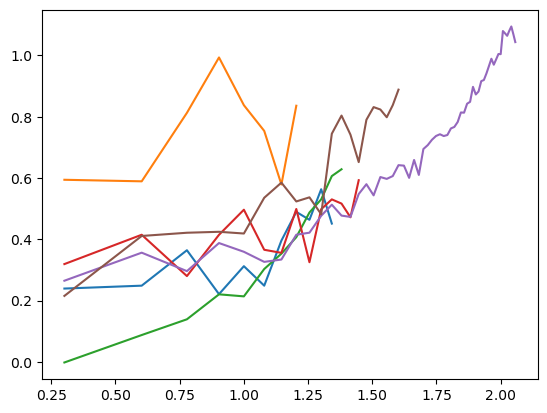

In [23]:
df_comb = pd.DataFrame()
for i in df_exp_filtered.track_id.unique():
    a = df_exp_filtered[df_exp_filtered.track_id == i]

    time= [ 0+(2*i) for i in a.frame.values]

    a.loc[:,'frame'] = time

    df = calculate_single_tamsd(a)
    
    if df.empty == True:
        continue
    else:
        df['track_id'] = i
        df_comb = pd.concat([df_comb,df],axis=0)
    plt.plot(np.log10(df.lags.values),np.log10(df.tamsd.values),label=i)

In [71]:
def calculate_multiple_tamsd(df_exp_filtered):
    df_comb = pd.DataFrame()
    for j in df_exp_filtered.concentration.unique():
        for k in df_exp_filtered.dt.unique():
            for i in df_exp_filtered.track_id.unique():
                for l in df_exp_filtered.seq.unique():
                    b = df_exp_filtered[(df_exp_filtered.concentration == j)&(df_exp_filtered.dt == k)&(df_exp_filtered.seq == l)].copy(deep=True)
                    a = b[b.track_id == i].copy(deep=True)

                    time= [ 0+(2*i) for i in a.frame.values]

                    a.loc[:,'frame'] = time

                    df = calculate_single_tamsd(a)
                    
                    if df.empty == True:
                        continue
                    else:
                        df['track_id'] = i
                        df['concentration'] = j
                        df['dt'] = k
                        df_comb = pd.concat([df_comb,df],axis=0)
    return df_comb

In [72]:
df_msd_combined = calculate_multiple_tamsd(df_comb)

In [47]:
df_msd_combined

,lags,tamsd,track_id,concentration,dt
0,2,49.153699,1,50,10
1,4,55.159135,1,50,10
2,6,53.194208,1,50,10
3,8,49.729171,1,50,10
4,10,38.348740,1,50,10
...,...,...,...,...,...
8,18,0.827295,127,100,2
9,20,0.878011,127,100,2
10,22,1.082524,127,100,2
11,24,1.147135,127,100,2


In [15]:
df_gt = pd.DataFrame()

for i in os.listdir(f'/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/{concentration}pM/dt_{dt}/{sweep}/'):
    if f'gt_{concentration}pM_seq' in i:
        df = pd.read_csv(f'/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/{concentration}pM/dt_{dt}/{sweep}/{i}')
        df['seq'] = [int(i.split('_')[-1].split('.')[0])]*len(df)
        df_gt = pd.concat([df_gt,df],axis=0)

NameError: name 'concentration' is not defined

In [48]:
def open_gt(concentration,dt,sweep):    
    df_gt = pd.DataFrame()

    for i in os.listdir(f'/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/{concentration}pM/dt_{dt}/{sweep}/'):
        if f'gt_{concentration}pM_seq' in i:
            df = pd.read_csv(f'/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/{concentration}pM/dt_{dt}/{sweep}/{i}')
            df['seq'] = [int(i.split('_')[-1].split('.')[0])]*len(df)
            df_gt = pd.concat([df_gt,df],axis=0)

    return df_gt

In [49]:
df = df_comb[['concentration','dt','sweep']].dropna().drop_duplicates()

In [50]:
df

,concentration,dt,sweep
0,50,10,new_crop
0,50,4,new_crop
0,50,2,new_crop
0,75,10,filtered_tracks
1,75,4,first_sweep
5,75,2,filtered_tracks
0,100,10,filtered_tracks
1,100,4,filtered_tracks
1,100,2,large_sweep


In [51]:
df_comb_gt = pd.DataFrame()
for i in df.iloc:
    print(i.concentration,i['dt'],i.sweep)
    df_gt = open_gt(i.concentration,i['dt'],i.sweep)
    df_gt['concentration'] = i.concentration
    df_gt['dt'] = i['dt']
    df_gt['sweep'] = i.sweep
    df_comb_gt = pd.concat([df_comb_gt,df_gt],axis=0)

50 10 new_crop
50 4 new_crop
50 2 new_crop
75 10 filtered_tracks
75 4 first_sweep
75 2 filtered_tracks
100 10 filtered_tracks
100 4 filtered_tracks
100 2 large_sweep


In [52]:
df_comb_gt

,track_id,x,y,z,frame_real,frame,seq,concentration,dt,sweep
0,0,3.598326,5.658501,2.0,28,5,3,50,10,new_crop
1,0,4.655088,2.843365,0.0,3,0,3,50,10,new_crop
2,0,3.685467,3.906702,2.0,18,3,3,50,10,new_crop
3,0,2.122857,5.657437,3.0,33,6,3,50,10,new_crop
4,0,4.086550,3.518647,2.0,8,1,3,50,10,new_crop
...,...,...,...,...,...,...,...,...,...,...
1132,124,16.278979,19.878405,NaN,103,103,0,100,2,large_sweep
1133,124,16.907422,20.475273,NaN,104,104,0,100,2,large_sweep
1134,125,15.668143,2.613236,NaN,105,105,0,100,2,large_sweep
1135,125,15.133479,1.784187,NaN,106,106,0,100,2,large_sweep


In [21]:
def calculate_rototranslation_3D(A, B):
    """Return translation and rotation matrices.
    Args:
        A: coodinates of moving set of points (to which roto translation needs to be applied).
        B: coordinates of fixed set of points.

    Return:
        R, t: rotation and translation matrix
    """
    if None in A or None in B:
        return None, None
    
    A = np.transpose(A)
    B = np.transpose(B)

    num_rows, num_cols = A.shape
    if num_rows != 3 and num_cols !=3:
        raise Exception(f"matrix A is not 3xN, it is {num_rows}x{num_cols}")

    num_rows, num_cols = B.shape
    if num_rows != 3 and num_cols !=3:
        raise Exception(f"matrix B is not 3xN, it is {num_rows}x{num_cols}")

    # find mean column wise
    centroid_A = np.mean(A, axis=1)
    centroid_B = np.mean(B, axis=1)

    # ensure centroids are 3x1
    centroid_A = centroid_A.reshape(-1, 1)
    centroid_B = centroid_B.reshape(-1, 1)

    # subtract mean
    Am = A - centroid_A
    Bm = B - centroid_B

    H = Am @ np.transpose(Bm)

    # find rotation
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T

    # special reflection case
    if np.linalg.det(R) < 0:
        Vt[2, :] *= -1
        R = Vt.T @ U.T

    t = -R @ centroid_A + centroid_B

    return R, t

def rototranslation_correction_cell(df):
    """Return corrected dataframe given a dataframe with coordinate as input."""
    frames = sorted(df["frame"].unique())
    prev_df = df[df["frame"] == frames[0]].copy()
    #out = prev_df.copy()
    temp_df = prev_df.copy()
    #out[["xres", "yres", "zres"]] = 0
    temp_df[["xres", "yres", "zres"]] = 0
    out_lst = [temp_df]

    rotation = []
    degree_rotation = []
    translation = []
    degree_translation = []
    for idx in np.arange(1, len(frames)):
        curr_df = df[df["frame"] == frames[idx]].copy()
        keep = np.intersect1d(curr_df["track_id"], prev_df["track_id"])
        #print(len(keep))
        #print(keep)
        if len(keep)>3:
            curr4correction = pd.concat([curr_df[curr_df["track_id"] == keptTrack][["x", "y", "z"]] for keptTrack in keep]).values
            prev4correction = pd.concat([prev_df[prev_df["track_id"] == keptTrack][["x", "y", "z"]] for keptTrack in keep]).values

            R, t = calculate_rototranslation_3D(curr4correction, prev4correction)
        else:
            R, t = None, None


        if R is None:
            prev_df = curr_df.copy()
            continue
        # from http://motion.cs.illinois.edu/RoboticSystems/3DRotations.html
        degree_rotation.append(np.arccos((np.trace(R) - 1) / 2))
        degree_translation.append(np.sqrt(np.sum(np.square(t))))
        rotation.append(R)
        translation.append(t)

        prev_df = curr_df.copy()
        curr = np.array(prev_df[["x", "y", "z"]])
        rang = np.arange(len(rotation))
        original_pos = curr.copy()
        for j in rang[::-1]:
            if rotation[j] is not None:
                curr = np.transpose(rotation[j] @ curr.T + translation[j])
        curr_df[["x", "y", "z"]] = curr
        curr_df[["xres", "yres", "zres"]] = curr - original_pos
        #out = pd.concat([out, curr_df])
        out_lst.append(curr_df)
    out = pd.concat(out_lst)
    try:
        out["degree_av_rotation"] = np.mean(degree_rotation)
    except:
        out["degree_av_rotation"] = None
    try:
        out["degree_av_translation"] = np.mean(degree_translation)
    except:
        out["degree_av_translation"] = None
        
    return out

In [26]:
a

,track_id,x,y,z,frame_real,frame,seq,concentration,dt,sweep
0,0,4.446785,2.666805,0,0,0,0,50,4,new_crop
1,0,1.713847,4.650553,0,40,20,0,50,4,new_crop
2,0,4.579397,2.778915,0,2,1,0,50,4,new_crop
3,0,3.716691,3.232835,0,16,8,0,50,4,new_crop
4,0,3.598326,5.658501,0,28,14,0,50,4,new_crop
...,...,...,...,...,...,...,...,...,...,...
147,42,25.723482,14.901033,0,51,25,1,50,4,new_crop
148,42,23.774595,16.979226,0,95,47,1,50,4,new_crop
149,42,25.097128,15.533599,0,53,26,1,50,4,new_crop
150,42,24.580695,15.613575,0,55,27,1,50,4,new_crop


In [27]:
df_list = []

for i in df_comb_gt.concentration.unique():
    print(i)
    for j in df_comb_gt.dt.unique():
        a = df_comb_gt[(df_comb_gt.concentration==i)&(df_comb_gt['dt']==j)]
        a['z'] = [0] * len(a)
        for k in a.seq.unique():
            df_list.append(rototranslation_correction_cell(a[a.seq == k]))


50


/scratch/louaness/ipykernel_97581/4266796208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['z'] = [0] * len(a)
/tungstenfs/scratch/ggiorget/nessim/miniconda3/envs/tracking/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/tungstenfs/scratch/ggiorget/nessim/miniconda3/envs/tracking/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tungstenfs/scratch/ggiorget/nessim/miniconda3/envs/tracking/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/t

75


/scratch/louaness/ipykernel_97581/4266796208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['z'] = [0] * len(a)
/scratch/louaness/ipykernel_97581/4266796208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['z'] = [0] * len(a)


100


/scratch/louaness/ipykernel_97581/4266796208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['z'] = [0] * len(a)
/scratch/louaness/ipykernel_97581/4266796208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['z'] = [0] * len(a)
/scratch/louaness/ipykernel_97581/4266796208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [28]:
df_corrected = pd.concat(df_list)

In [42]:
df_corrected

,track_id,x,y,z,frame_real,frame,seq,concentration,dt,sweep,xres,yres,zres,degree_av_rotation,degree_av_translation
1,0,4.655088,2.843365,0.0,3,0,3,50,10,new_crop,0.000000,0.000000,0.0,NaN,NaN
9,1,13.389593,7.731107,0.0,3,0,3,50,10,new_crop,0.000000,0.000000,0.0,NaN,NaN
16,4,3.108368,16.006777,0.0,3,0,3,50,10,new_crop,0.000000,0.000000,0.0,NaN,NaN
1,0,4.579397,2.778915,0.0,2,0,2,50,10,new_crop,0.000000,0.000000,0.0,NaN,NaN
9,1,13.466410,7.209158,0.0,2,0,2,50,10,new_crop,0.000000,0.000000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,210,10.459473,9.873349,0.0,183,183,0,100,2,large_sweep,5.870033,6.141914,0.0,0.025581,0.67102
404,137,21.060154,14.453698,0.0,184,184,0,100,2,large_sweep,5.185601,8.308556,0.0,0.025581,0.67102
558,162,21.697583,24.059855,0.0,184,184,0,100,2,large_sweep,3.228354,8.643670,0.0,0.025581,0.67102
668,75,19.459398,29.908770,0.0,184,184,0,100,2,large_sweep,1.980777,8.308899,0.0,0.025581,0.67102


In [43]:
df_comb_gt

,track_id,x,y,z,frame_real,frame,seq,concentration,dt,sweep
0,0,3.598326,5.658501,2.0,28,5,3,50,10,new_crop
1,0,4.655088,2.843365,0.0,3,0,3,50,10,new_crop
2,0,3.685467,3.906702,2.0,18,3,3,50,10,new_crop
3,0,2.122857,5.657437,3.0,33,6,3,50,10,new_crop
4,0,4.086550,3.518647,2.0,8,1,3,50,10,new_crop
...,...,...,...,...,...,...,...,...,...,...
1132,124,16.278979,19.878405,NaN,103,103,0,100,2,large_sweep
1133,124,16.907422,20.475273,NaN,104,104,0,100,2,large_sweep
1134,125,15.668143,2.613236,NaN,105,105,0,100,2,large_sweep
1135,125,15.133479,1.784187,NaN,106,106,0,100,2,large_sweep


In [49]:
track_unc = df_comb_gt[(df_comb_gt.concentration == 75)& (df_comb_gt['dt'] == 10)&(df_comb_gt.seq == 1)&(df_comb_gt.track_id == 0)]
track_c = df_corrected[(df_corrected.concentration == 75)& (df_corrected['dt'] == 10)&(df_corrected.seq == 1)&(df_corrected.track_id == 0)]
track_unc.sort_values(by='frame',inplace=True)
track_c.sort_values(by='frame',inplace=True)

/scratch/louaness/ipykernel_97581/1340310380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_unc.sort_values(by='frame',inplace=True)
/scratch/louaness/ipykernel_97581/1340310380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_c.sort_values(by='frame',inplace=True)


In [55]:
track_unc

,track_id,x,y,z,frame_real,frame,seq,concentration,dt,sweep
6,0,27.162923,24.192226,NaN,1,0,1,75,10,filtered_tracks
4,0,27.386721,25.215471,NaN,6,1,1,75,10,filtered_tracks
3,0,27.496385,23.988011,NaN,11,2,1,75,10,filtered_tracks
1,0,24.803930,21.252336,NaN,21,4,1,75,10,filtered_tracks
0,0,26.560171,19.939766,NaN,26,5,1,75,10,filtered_tracks
7,0,25.425315,18.581869,NaN,36,7,1,75,10,filtered_tracks
5,0,26.014093,19.567350,NaN,41,8,1,75,10,filtered_tracks
2,0,24.516839,18.966826,NaN,46,9,1,75,10,filtered_tracks


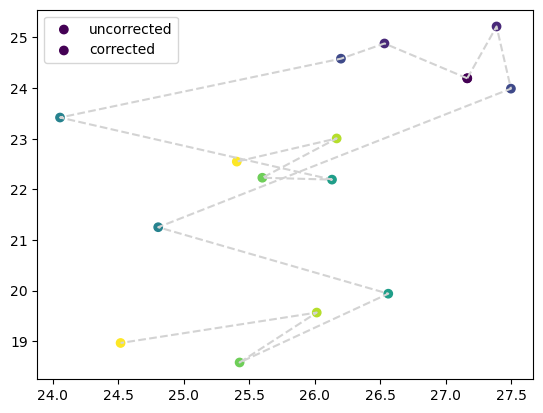

In [60]:
fig,ax = plt.subplots()
ax.scatter(track_unc.x,track_unc.y,label='uncorrected',c=track_unc.frame)
ax.scatter(track_c.x,track_c.y,label='corrected',c=track_c.frame,cmzap)

ax.plot(track_unc.x,track_unc.y,linestyle='--',c='lightgrey')
plt.plot(track_c.x,track_c.y,linestyle='--',c='lightgrey')
plt.legend()

In [53]:
df_gt_msd = calculate_multiple_tamsd(df_comb_gt)

/scratch/louaness/ipykernel_37117/2690475240.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.loc[:,'frame'] = time
/scratch/louaness/ipykernel_37117/2690475240.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.loc[:,'frame'] = time
/scratch/louaness/ipykernel_37117/2690475240.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

/scratch/louaness/ipykernel_245577/3194247648.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.loc[:,'frame'] = time
/scratch/louaness/ipykernel_245577/3194247648.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.loc[:,'frame'] = time
/scratch/louaness/ipykernel_245577/3194247648.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

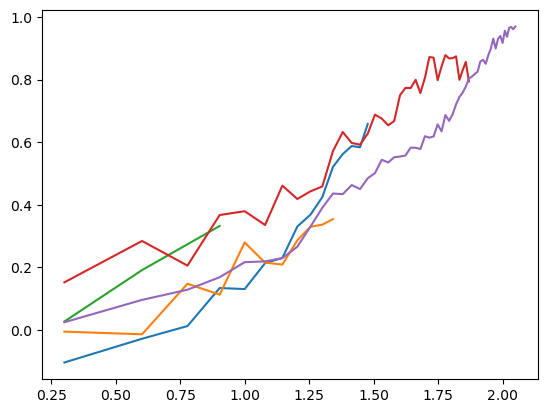

In [25]:
df_comb_gt = pd.DataFrame()
for i in set(df_gt.track_id.values):
    a = df_gt[df_gt.track_id == i]

    time= [ 0+(2*i) for i in a.frame.values]

    a.loc[:,'frame'] = time

    df = calculate_single_tamsd(a)
    
    if df.empty == True:
        continue
    else:
        df['track_id'] = i
        df_comb_gt = pd.concat([df_comb_gt,df],axis=0)
    plt.plot(np.log10(df.lags.values),np.log10(df.tamsd.values),label=i)

In [187]:
df_comb_gt

,lags,tamsd,track_id
0,2,2.881322,5
1,4,3.357102,5
2,6,3.933585,5
3,8,4.556883,5
4,10,5.171926,5
...,...,...,...
12,26,12.457636,30
13,28,12.993156,30
14,30,14.446830,30
15,32,17.311878,30


In [46]:
a = df_msd_combined[(df_msd_combined.concentration == 50)&(df_msd_combined['dt']==10)].copy(deep=True)

In [47]:
b = df_gt_msd[(df_gt_msd.concentration == 50)&(df_gt_msd['dt']==10)].copy(deep=True)

In [48]:
a['type'] = ['exp']*len(a)
b['type'] = ['gt']*len(b)

In [49]:
c = pd.concat([a,b],axis=0)

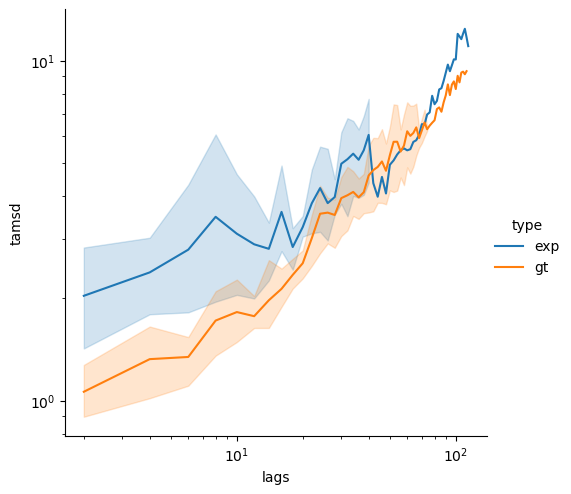

In [50]:
# plot a and b on the same seaborn relplot 
sns.relplot(x='lags',y='tamsd',data=c,hue='type',kind='line')
plt.xscale('log')
plt.yscale('log')

In [33]:
df = df_msd_combined.groupby('lags').mean().reset_index()
df_gt = df_gt_msd.groupby('lags').mean().reset_index()

In [38]:
c

,lags,tamsd,track_id,concentration,dt,Type of track
0,2,1.039404,4,50,10,LAPtrack
1,4,3.458280,4,50,10,LAPtrack
2,6,5.206180,4,50,10,LAPtrack
3,8,7.423788,4,50,10,LAPtrack
4,10,10.795155,4,50,10,LAPtrack
...,...,...,...,...,...,...
1,4,6.416547,100,100,2,Ground truth
2,6,5.689232,100,100,2,Ground truth
3,8,6.440388,100,100,2,Ground truth
4,10,4.725067,100,100,2,Ground truth


/scratch/louaness/ipykernel_277337/1274996959.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=c[c.type == 'exp'],x='lags',y='tamsd',label='experimental tracks with best parameters',ci=None)
/scratch/louaness/ipykernel_277337/1274996959.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=c[c.type == 'gt'],x='lags',y='tamsd',label='ground truth tracks',ci = None)


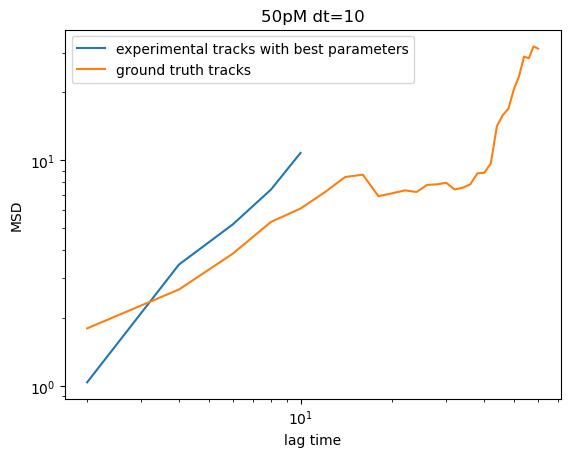

In [50]:
concentration = 50
dt = 10

sns.lineplot(data=c[c.type == 'exp'],x='lags',y='tamsd',label='experimental tracks with best parameters',ci=None)
sns.lineplot(data=c[c.type == 'gt'],x='lags',y='tamsd',label='ground truth tracks',ci = None)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('lag time')
plt.ylabel('MSD')
plt.title(f'{concentration}pM dt={dt}')
plt.savefig(f"plots/MSD_best_parameters_{concentration}pM_dt_{dt}.png",dpi=300)

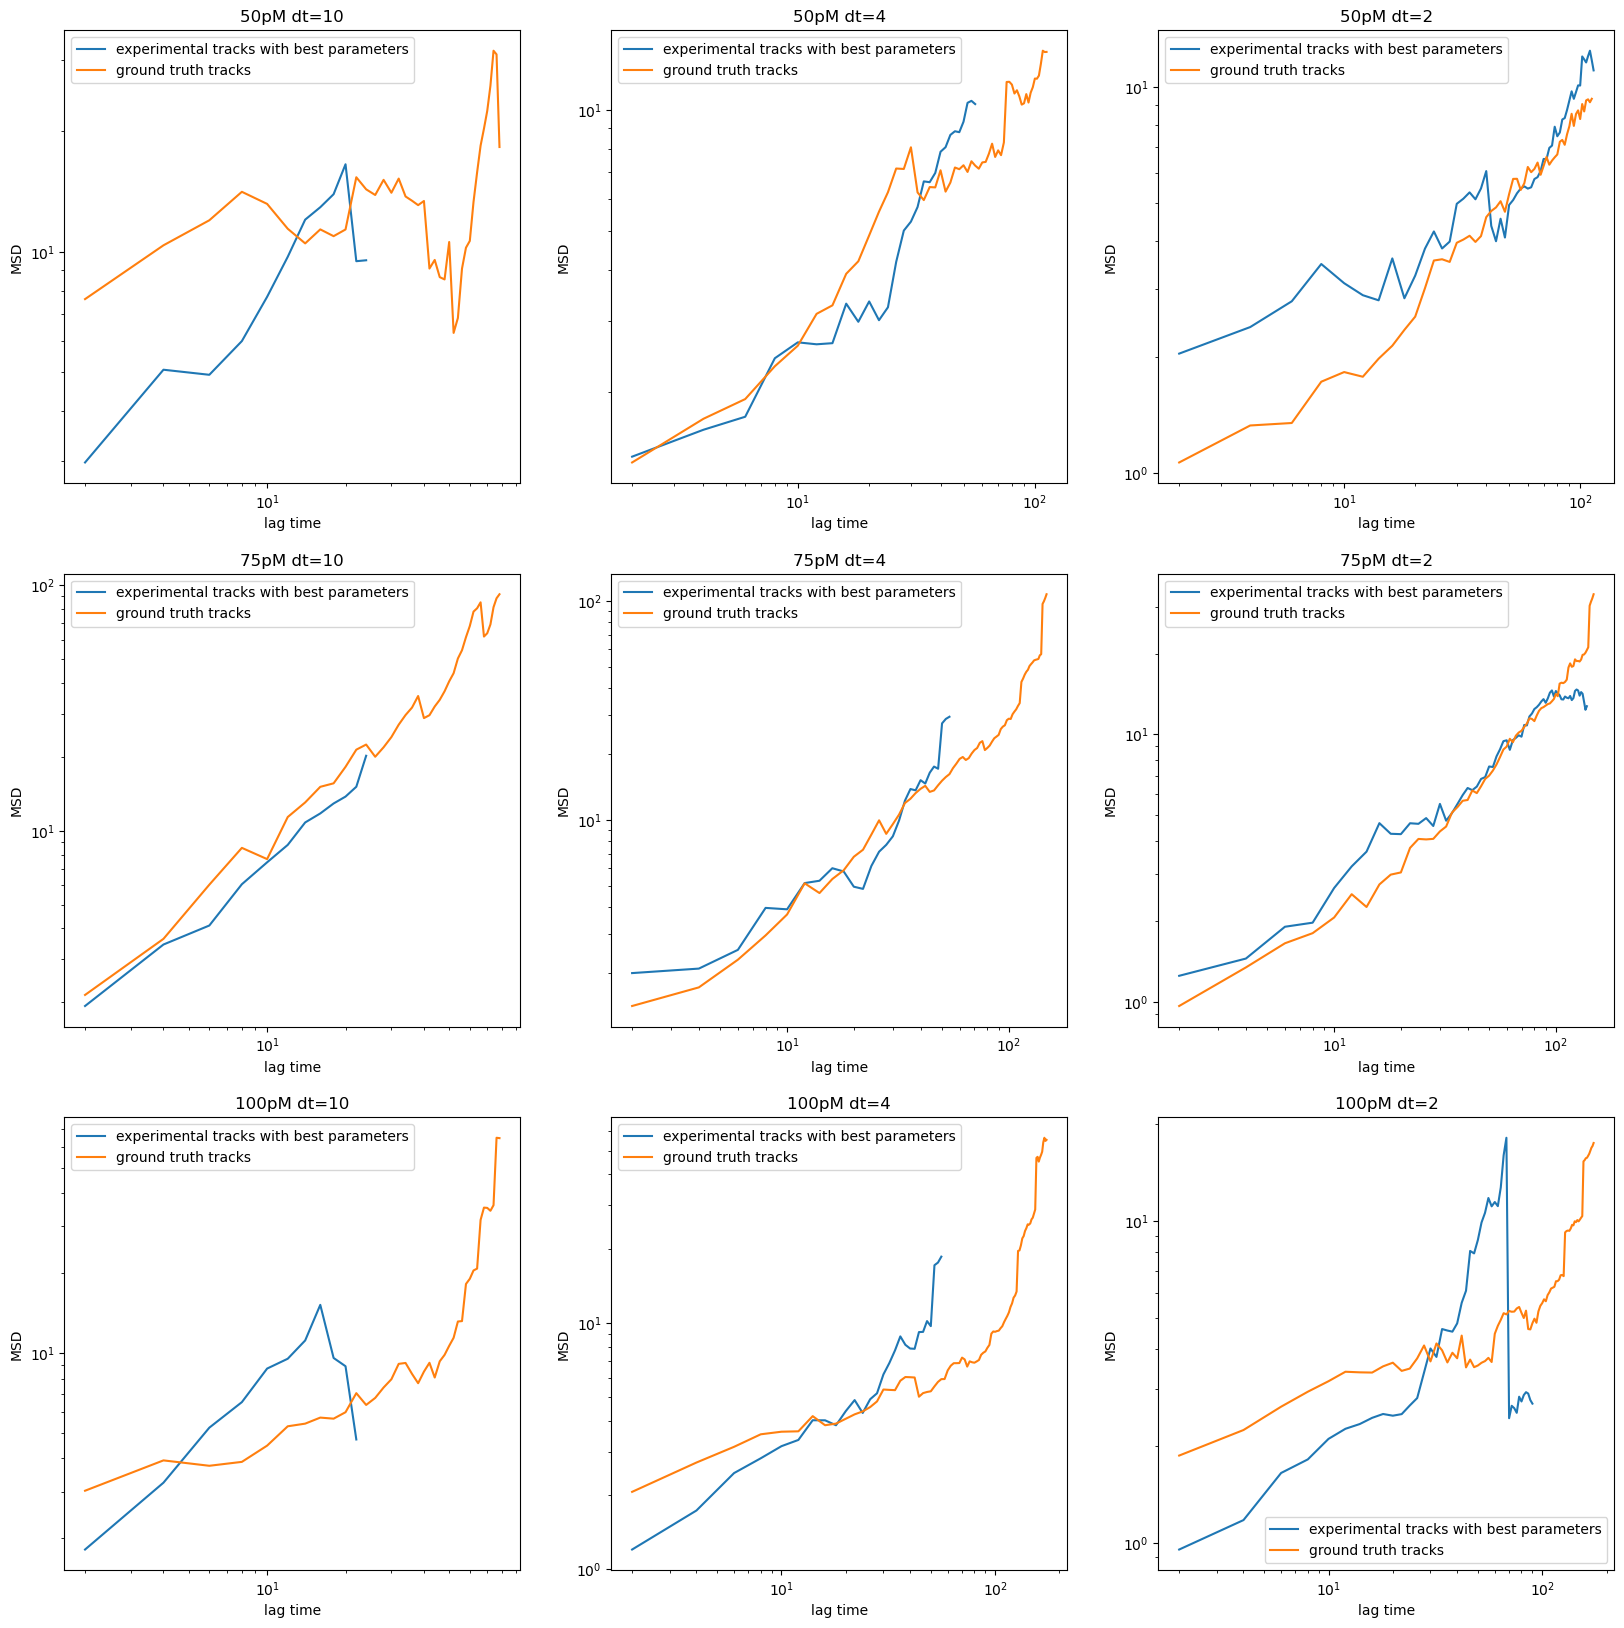

In [134]:
fig,ax = plt.subplots(3,3,figsize=(20,20))
ax = ax.ravel()

for l,i in enumerate(df.iloc):
    df_exp = df_msd_combined[(df_msd_combined.concentration == i.concentration)&(df_msd_combined['dt'] == i['dt'])].groupby('lags').mean().reset_index()
    df_gt = df_gt_msd[(df_gt_msd.concentration == i.concentration)&(df_gt_msd['dt']== i['dt'])].groupby('lags').mean().reset_index()
    sns.lineplot(data=df_exp,x='lags',y='tamsd',label='experimental tracks with best parameters',ax=ax[l])
    sns.lineplot(data=df_gt,x='lags',y='tamsd',label='ground truth tracks',ax=ax[l])
    ax[l].set_title(f'{i.concentration}pM dt={i["dt"]}')

for a in ax:
    a.set_yscale('log')
    a.set_xscale('log')
    a.set_xlabel('lag time')
    a.set_ylabel('MSD')

plt.savefig(f"plots/MSD_best_parameters_all.png",dpi=300)

In [100]:
a = df_msd_combined.copy(deep=True)
b = df_gt_msd.copy(deep=True)

In [101]:
a['Type of track'] = ['LAPtrack']*len(a)
b['Type of track'] = ['Ground truth']*len(b)

In [102]:
c = pd.concat([a,b],axis=0)

In [103]:
c.tamsd = c.tamsd *(0.16**2) 
c.tamsd = c.tamsd - (2*(0.035**2))

In [104]:
# c.loc[c['lags']==2,'lags'] = c.loc[c['lags']==2,'lags']*2
# c.loc[c['lags']==4,'lags'] = c.loc[c['lags']==4,'lags']*4
# c.loc[c['lags']==10,'lags'] = c.loc[c['lags']==10,'lags']*10


In [105]:
c.rename(columns={'tamsd':r'MSD $\mu m^2$'},inplace=True)

In [106]:
labels = 15
legend_title = labels +1
sns.set_context("paper", font_scale=2)#rc={"font.size":labels,"axes.titlesize":labels,"axes.labelsize":labels,"legend.fontsize":labels,"legend.title_fontsize":legend_title,""})  

In [125]:
sns.color_palette('flare')

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

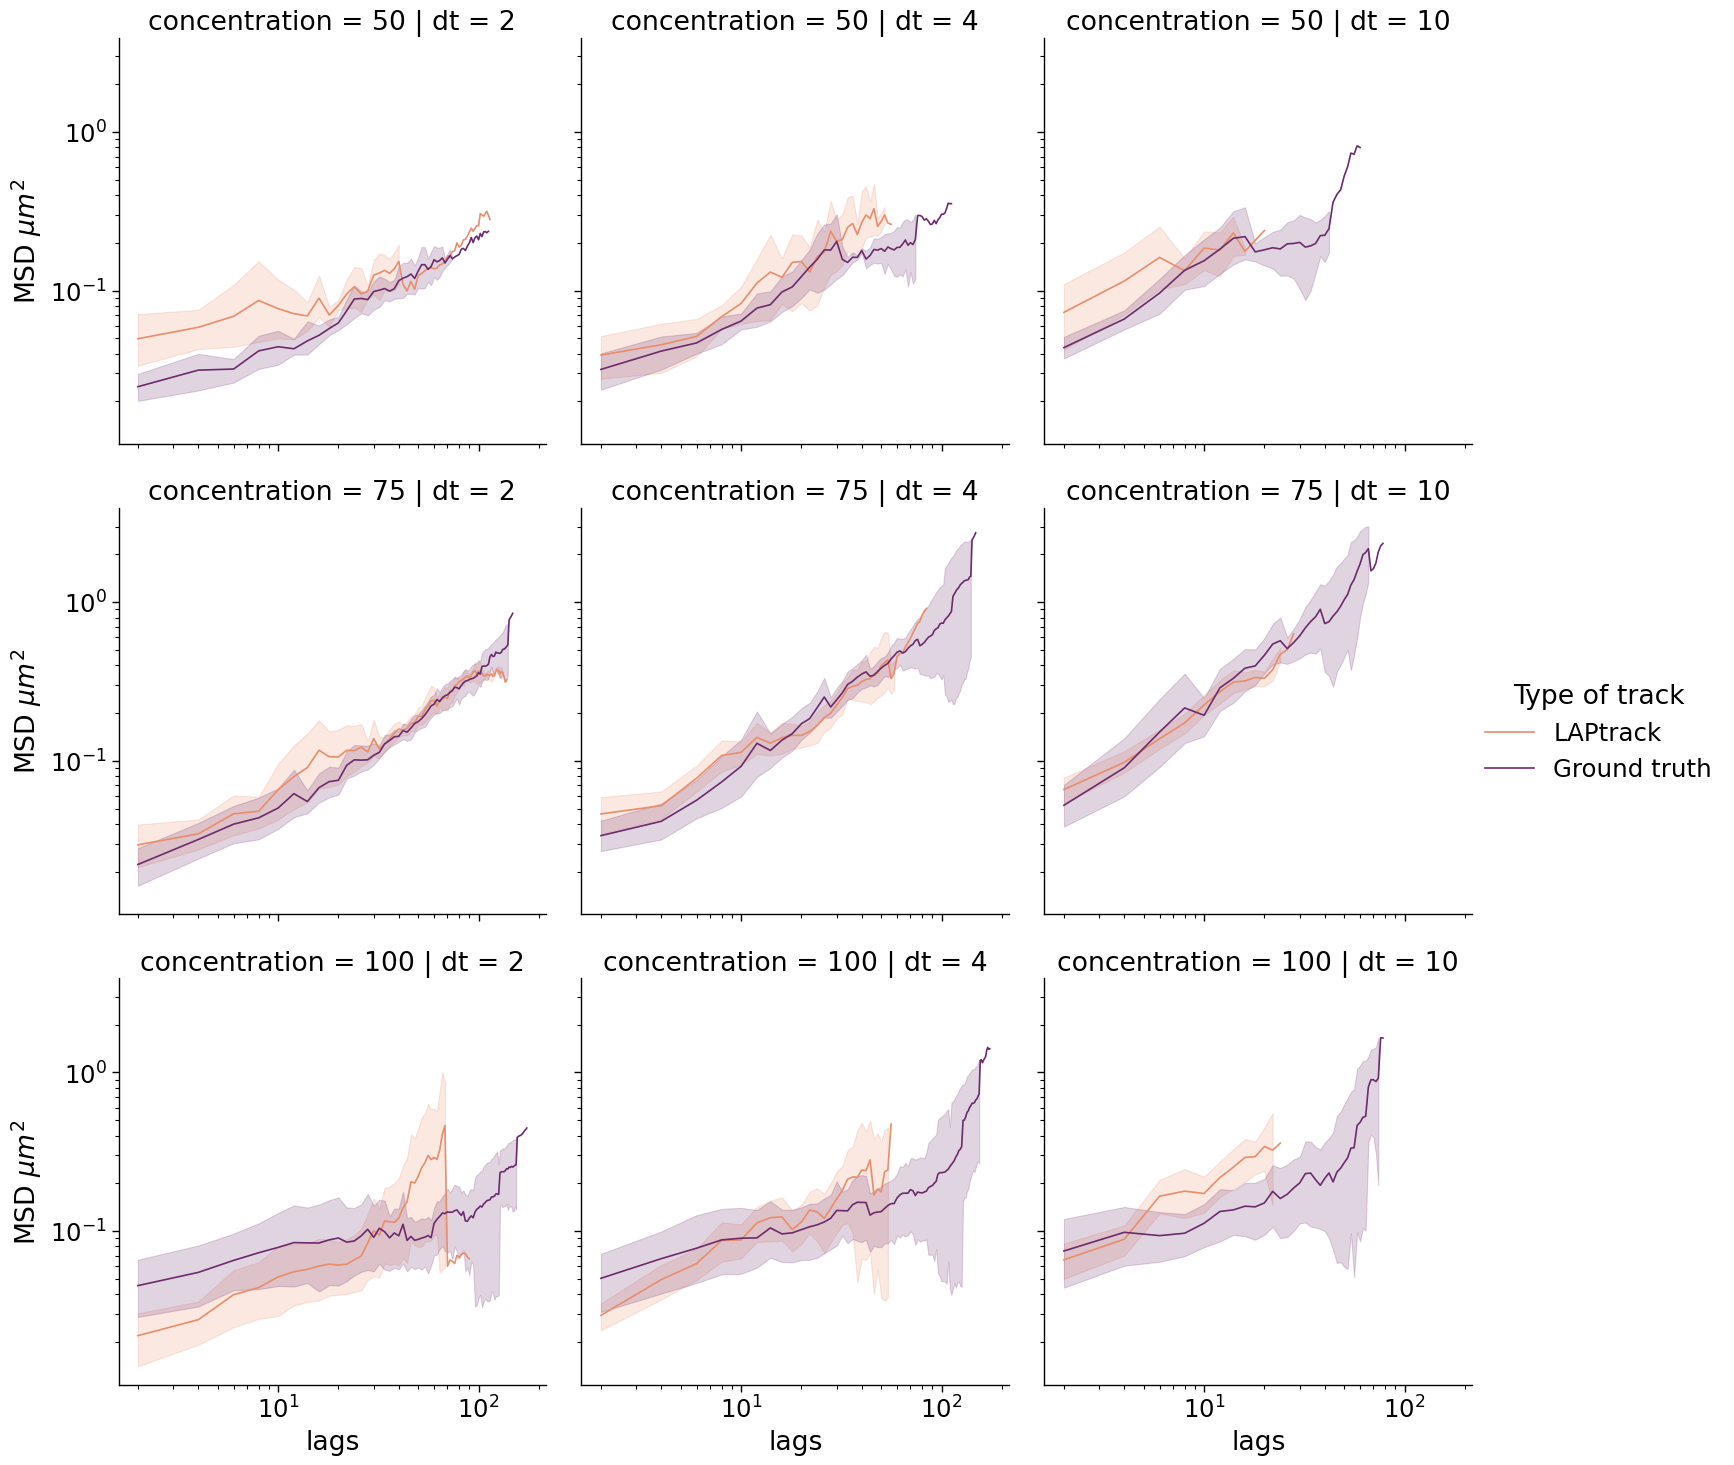

In [126]:
sns.relplot(x='lags',y=r'MSD $\mu m^2$',data=c,hue='Type of track',kind='line',row='concentration',col='dt',palette=[sns.color_palette('flare')[0],sns.color_palette('flare')[-1]])
plt.xscale('log')
plt.yscale('log')
plt.savefig('/tungstenfs/scratch/ggiorget/nessim/master_thesis/plots/benchmark_tracking_all.pdf',dpi=300,transparent=True)

In [108]:
d = c[c['dt']==10].copy(deep=True)

In [109]:
d.lags = d.lags*10

In [110]:
d.rename(columns={'lags':'lags(s)'},inplace=True)

In [115]:
d.loc[d.concentration == 50,'concentration'] = '50pM'
d.loc[d.concentration == 75,'concentration'] = '75pM'
d.loc[d.concentration == 100,'concentration'] = '100pM'


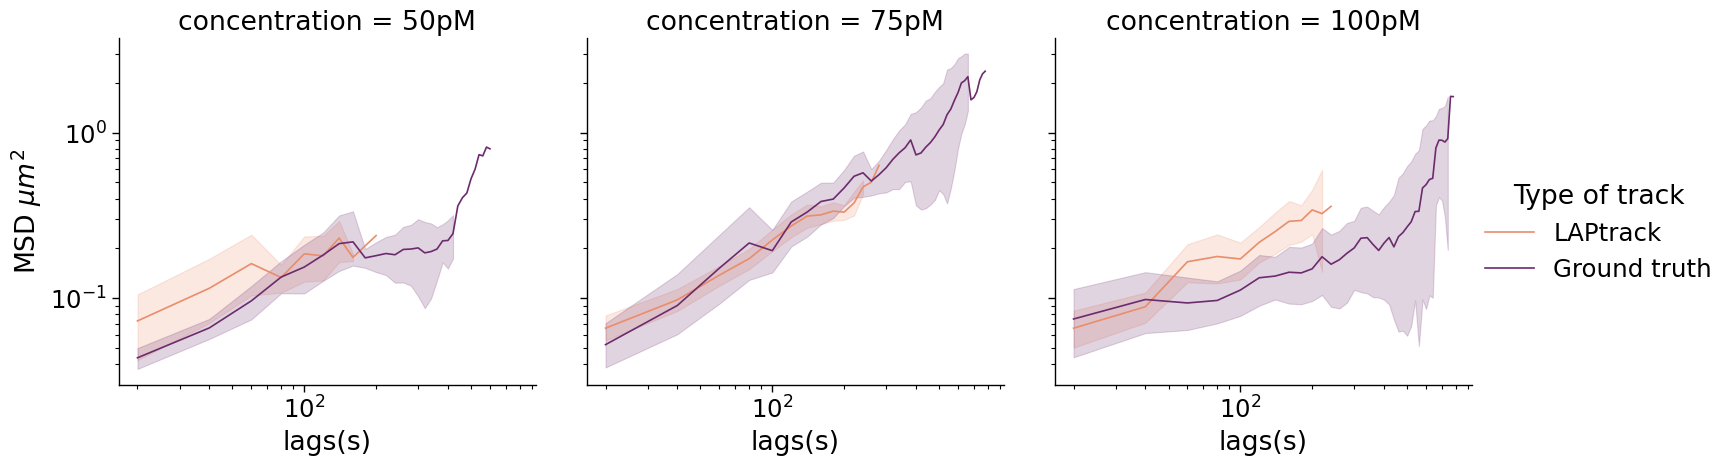

In [127]:
sns.relplot(x='lags(s)',y=r'MSD $\mu m^2$',data=d,hue='Type of track',kind='line',col='concentration',palette=[sns.color_palette('flare')[0],sns.color_palette('flare')[-1]])
plt.xscale('log')
plt.yscale('log')
plt.savefig('/tungstenfs/scratch/ggiorget/nessim/master_thesis/plots/benchmark_tracking_dt10.pdf',dpi=300,transparent=True)

In [78]:
d

,lags,tamsd,track_id,concentration,dt,Type of track
0,2,1.733826,4,50,2,LAPtrack
1,4,1.771869,4,50,2,LAPtrack
2,6,2.312656,4,50,2,LAPtrack
3,8,1.662554,4,50,2,LAPtrack
4,10,2.051324,4,50,2,LAPtrack
...,...,...,...,...,...,...
15,32,6.782446,51,50,2,LAPtrack
16,34,6.660581,51,50,2,LAPtrack
17,36,6.284753,51,50,2,LAPtrack
18,38,6.883849,51,50,2,LAPtrack


<AxesSubplot: xlabel='lags', ylabel='tamsd'>

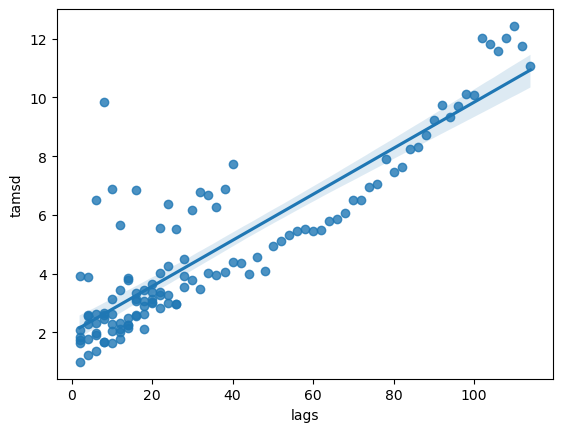

In [79]:
sns.regplot(x='lags',y='tamsd',data=d)

In [84]:
e = c.copy(deep=True)

AttributeError: 'int' object has no attribute 'copy'

In [85]:
e['lags'] = np.log10(e.lags.values)
e['tamsd'] = np.log10(e.tamsd.values)

/scratch/louaness/ipykernel_169438/93833717.py:2: RuntimeWarning: invalid value encountered in log10
  e['tamsd'] = np.log10(e.tamsd.values)


In [86]:
e.rename(columns={'lags':'lags','tamsd':'tamsd'},inplace=True)

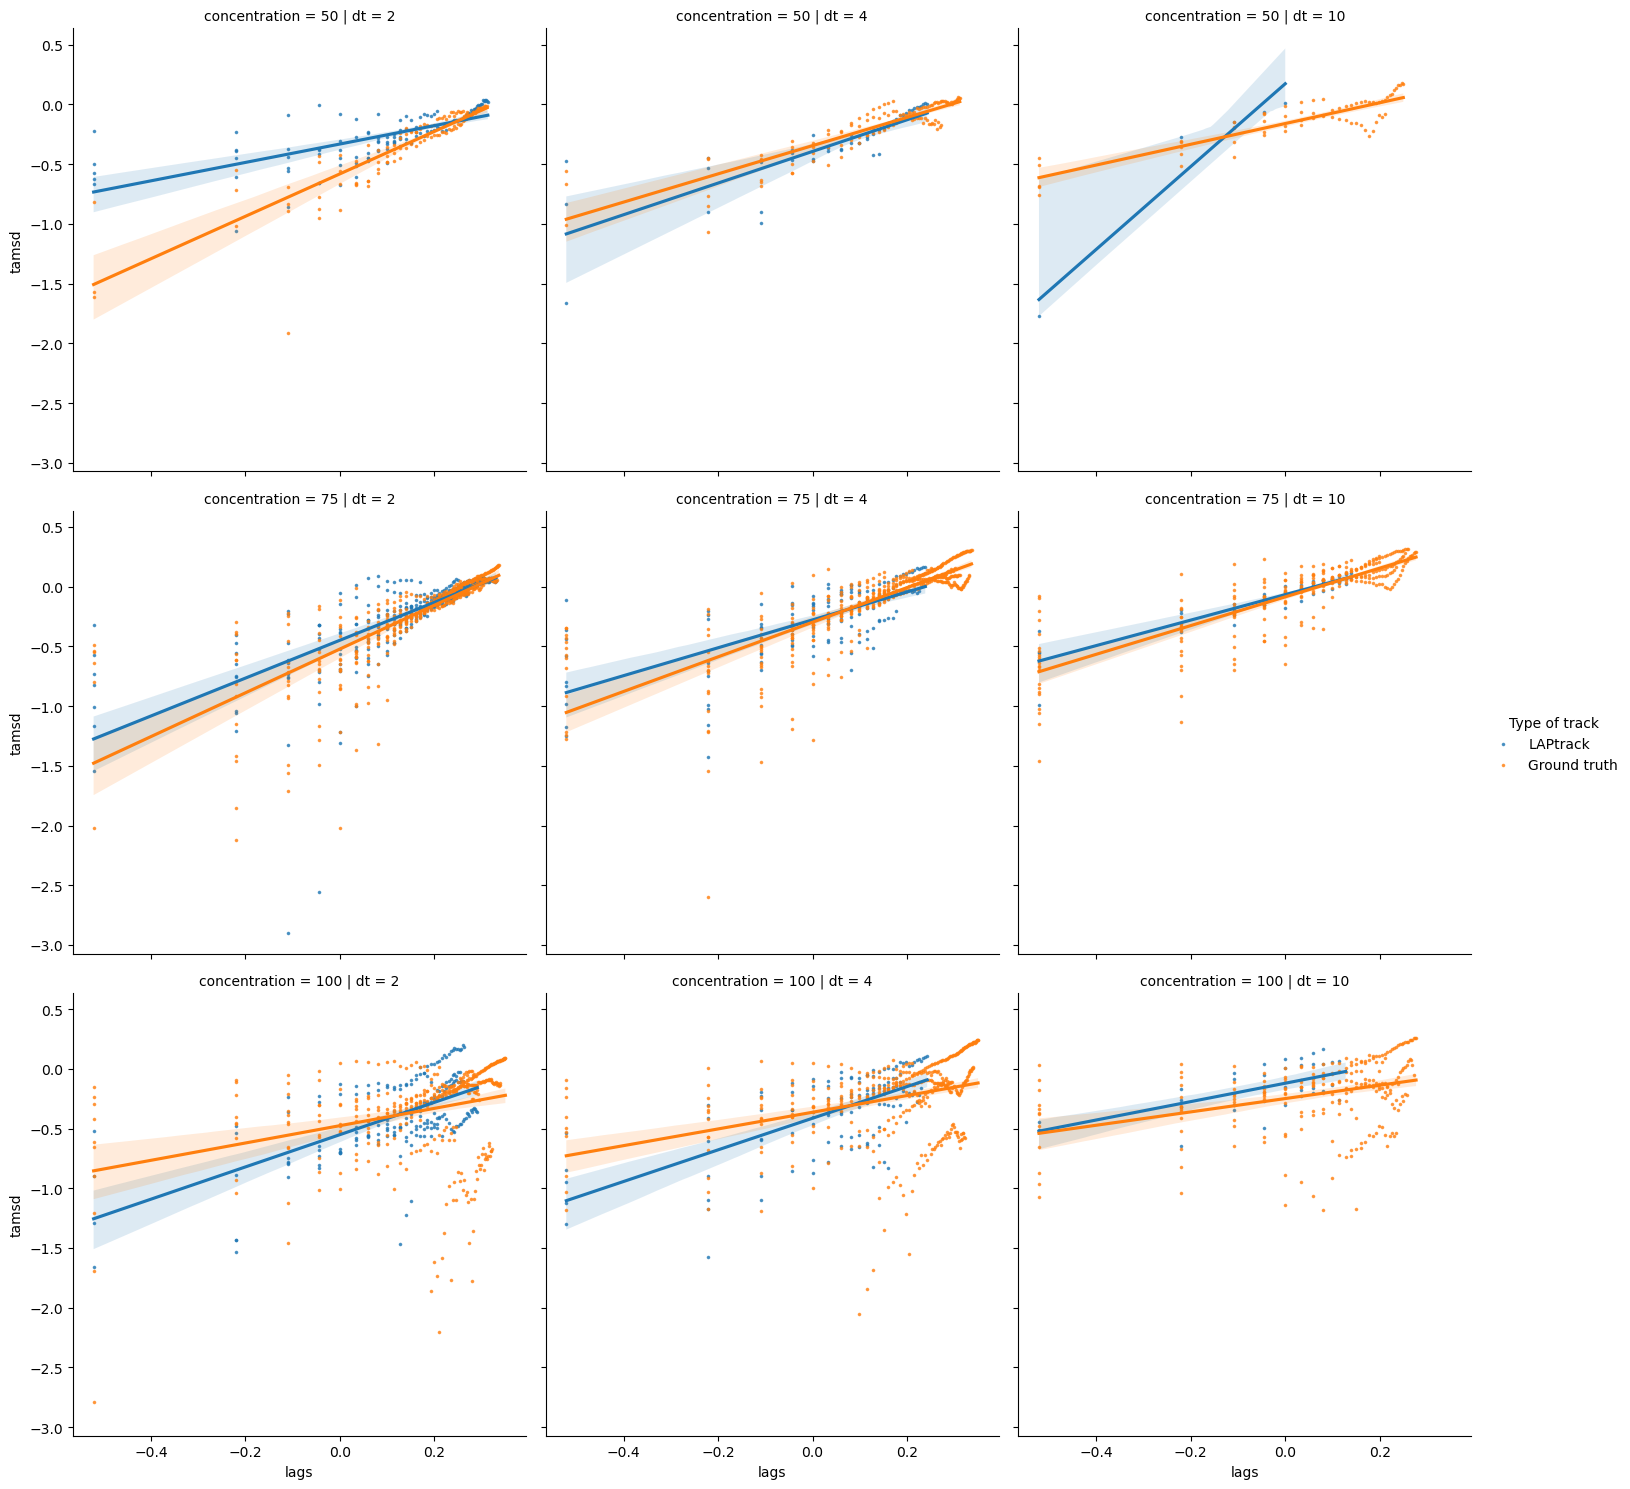

In [87]:
sns.lmplot(x='lags',y='tamsd',data=e,hue='Type of track',row='concentration',col='dt',markers='.',scatter_kws={"s": 10, "alpha": 0.7})

# plt.savefig(f"plots/MSD_best_parameters_all_fitted.png",dpi=300)

# compute alpha and D for gt tracks 

In [31]:
df_gt_msd

,lags,tamsd,track_id,concentration,dt
0,2,4.963773,0,75,10
1,4,4.561698,0,75,10
2,6,6.717445,0,75,10
3,8,7.965644,0,75,10
4,10,7.560982,0,75,10
...,...,...,...,...,...
0,2,3.365329,100,100,2
1,4,4.305129,100,100,2
2,6,3.161167,100,100,2
3,8,3.865976,100,100,2


In [32]:
df_gt_75_2 = df_gt_msd[(df_gt_msd.concentration == 75)&(df_gt_msd['dt'] == 2)].copy(deep=True)
df_gt_75_4 = df_gt_msd[(df_gt_msd.concentration == 75)&(df_gt_msd['dt'] == 4)].copy(deep=True)
df_gt_75_10 = df_gt_msd[(df_gt_msd.concentration == 75)&(df_gt_msd['dt'] == 10)].copy(deep=True) 

In [33]:
df_gt_75_4.track_id = df_gt_75_4.track_id + 1000
df_gt_75_10.track_id = df_gt_75_10.track_id + 2000

In [34]:
df_gt_75_4.lags = df_gt_75_4.lags*4
df_gt_75_10.lags = df_gt_75_10.lags*10
df_gt_75_2.lags = df_gt_75_2.lags*2

In [35]:
df_gt_75_comb = pd.concat([df_gt_75_2,df_gt_75_4,df_gt_75_10])

In [36]:
df_gt_75_comb.tamsd = df_gt_75_comb.tamsd*(0.16**2)
# df_gt_75_comb.lags = df_gt_75_comb.lags*2

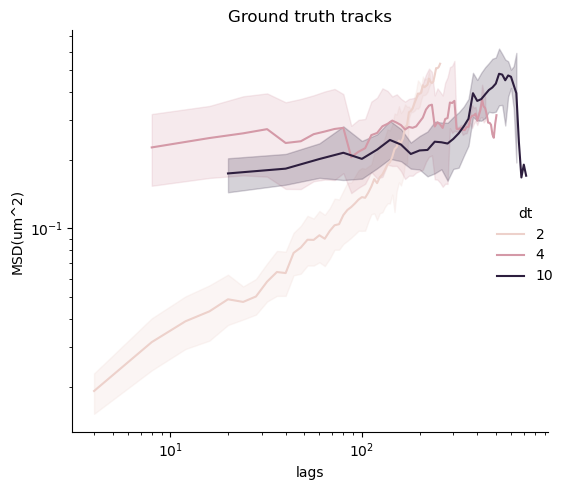

In [37]:
sns.relplot(x='lags',y='tamsd',data=df_gt_75_comb,kind='line',hue='dt')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('MSD(um^2)')
plt.xlabel('lags')
plt.title('Ground truth tracks')
plt.tight_layout()
# plt.savefig(f"plots/MSD_gt_75.png",dpi=300)

# add experimental tracks to the plot

In [191]:
df_exp = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/df_untreated.csv')

In [192]:
df_exp

,Unnamed: 0.1,Unnamed: 0,lags(s),MSD(µm^2),weight,uniqueid,track_id,trStart,channel,cell_type,treatment,correction,file
0,0,0,10.0,0.041686,21.0,c62f66cc1152e68a,79,0,cohesin,NIPBL,untreated,corrected,20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF...
1,1,1,20.0,0.049861,21.0,c62f66cc1152e68a,79,0,cohesin,NIPBL,untreated,corrected,20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF...
2,2,2,30.0,0.073884,21.0,c62f66cc1152e68a,79,0,cohesin,NIPBL,untreated,corrected,20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF...
3,3,3,40.0,0.103948,20.0,c62f66cc1152e68a,79,0,cohesin,NIPBL,untreated,corrected,20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF...
4,4,4,50.0,0.103560,19.0,c62f66cc1152e68a,79,0,cohesin,NIPBL,untreated,corrected,20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249300,111646,10,110.0,0.141185,14.0,16447e7eadf9278b,47574,148,DNA,WT,untreated,corrected,20230605_Rad21-Halo_G6_3_FullseqTIRF-Cy5-mCher...
1249301,111647,11,120.0,0.150271,13.0,16447e7eadf9278b,47574,148,DNA,WT,untreated,corrected,20230605_Rad21-Halo_G6_3_FullseqTIRF-Cy5-mCher...
1249302,111648,12,130.0,0.144934,12.0,16447e7eadf9278b,47574,148,DNA,WT,untreated,corrected,20230605_Rad21-Halo_G6_3_FullseqTIRF-Cy5-mCher...
1249303,111649,13,140.0,0.130239,11.0,16447e7eadf9278b,47574,148,DNA,WT,untreated,corrected,20230605_Rad21-Halo_G6_3_FullseqTIRF-Cy5-mCher...


In [193]:
df_exp.rename(columns={'lags(s)':'lags','MSD(µm^2)':'tamsd'},inplace=True)

In [194]:
df_gt_75_comb['type'] = ['ground truth']*len(df_gt_75_comb)
df_exp['type'] = ['experimental']*len(df_exp)
df_exp['dt'] = [10]*len(df_exp)
df_exp['track_id'] = df_exp.track_id + 4000
df_exp['concentration'] = [75]*len(df_exp)

In [195]:
df_exp = df_exp[['lags','tamsd','type','concentration','dt','track_id']]

In [196]:
df_comb = pd.concat([df_exp,df_gt_75_comb])

In [197]:
df_comb

,lags,tamsd,type,concentration,dt,track_id
0,10.0,0.041686,experimental,75,10,4079
1,20.0,0.049861,experimental,75,10,4079
2,30.0,0.073884,experimental,75,10,4079
3,40.0,0.103948,experimental,75,10,4079
4,50.0,0.103560,experimental,75,10,4079
...,...,...,...,...,...,...
6,140.0,0.495678,ground truth,75,10,2101
7,160.0,0.621917,ground truth,75,10,2101
0,20.0,0.022827,ground truth,75,10,2124
1,40.0,0.047194,ground truth,75,10,2124


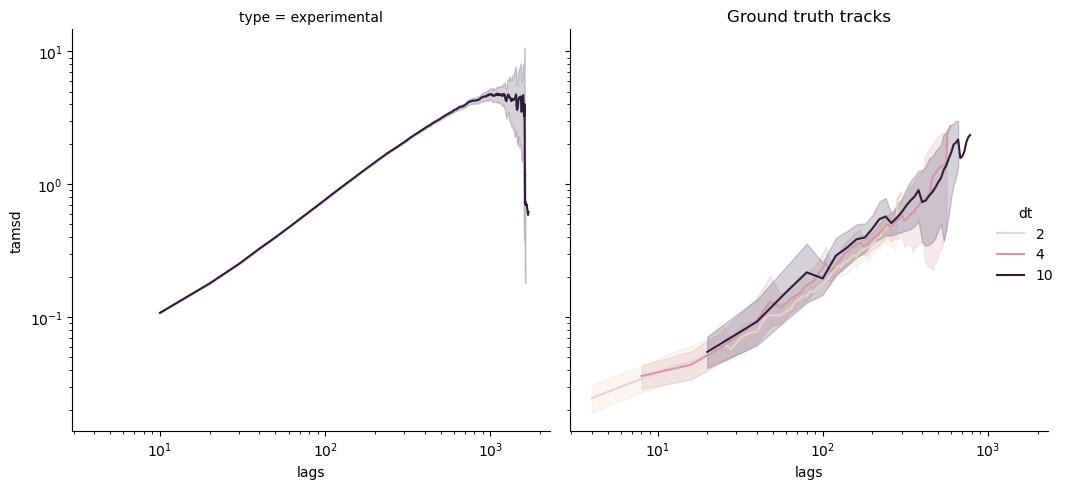

In [198]:
sns.relplot(x='lags',y='tamsd',data=df_comb,kind='line',hue='dt',col='type')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('MSD(um^2)')
plt.xlabel('lags')
plt.tight_layout()
# plt.savefig(f"plots/MSD_gt_75.png",dpi=300)

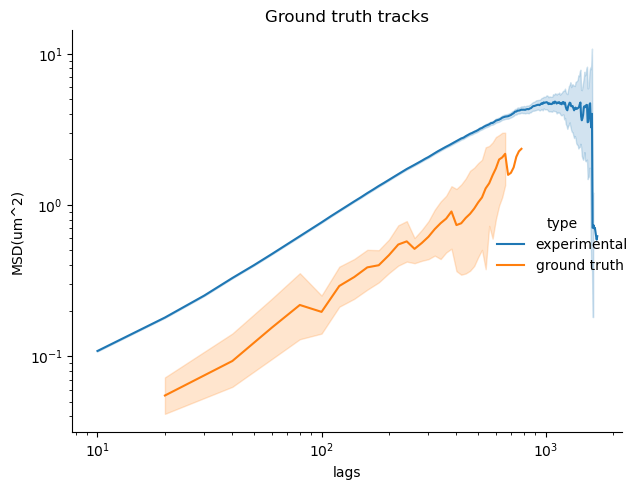

In [200]:
sns.relplot(x='lags',y='tamsd',data=df_comb[df_comb['dt']== 10],kind='line',hue='type')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('MSD(um^2)')
plt.xlabel('lags')
plt.title('Ground truth tracks')
plt.tight_layout()
# plt.savefig(f"plots/MSD_gt_75.png",dpi=300)

In [38]:
from sklearn.linear_model import LinearRegression
def get_D_alpha(traj, min_length=10, numPoints=5):
    if traj.shape[0]<min_length:
        return np.nan, np.nan,np.nan#, np.nan, np.nan,np.nan
    model = LinearRegression()
    x = np.log10(traj.loc[:,"lags"])
    y = np.log10(traj.loc[:,"tamsd"])
    # sampleWeight = traj.loc[traj.correction=="corrected","weight"]
    #print(x.to_numpy().reshape(-1,1)[:numPoints], y.to_numpy()[:numPoints], sampleWeight.to_numpy()[:numPoints])
    model.fit(x.to_numpy().reshape(-1,1)[:numPoints], y.to_numpy()[:numPoints])#, sample_weight = sampleWeight.to_numpy()[:numPoints])
    y_pred = model.predict(x.to_numpy().reshape(-1,1))
    return model.intercept_, model.coef_[0],traj.iloc[0]['dt']#,traj.iloc[0].file,traj.iloc[0].channel#10**y_pred,10**x

In [39]:
coefficients = df_gt_75_comb.groupby(by="track_id").apply(get_D_alpha, min_length=10, numPoints=5).to_frame()

In [40]:
coefficients['D'], coefficients['alpha'],coefficients['dt'] = zip(*coefficients.iloc[:,0])
coefficients['D'] = 10**coefficients['D']
coefficients.drop(columns=[0],inplace=True)

In [163]:
coefficients

,D,alpha,dt
track_id,,,
0,0.028544,0.470665,2.0
3,0.002166,0.923111,2.0
4,0.014258,0.378386,2.0
7,0.015423,0.307488,2.0
19,0.143585,-0.547597,2.0
...,...,...,...
2156,NaN,NaN,NaN
2169,NaN,NaN,NaN
2174,NaN,NaN,NaN


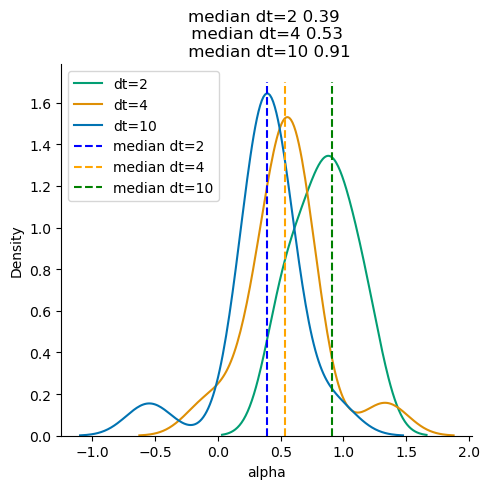

In [164]:
a = sns.displot(data=coefficients, x="alpha", kind="kde",hue='dt',common_norm=False,palette='colorblind',legend=False)
plt.tight_layout()
a.axes[0,0].vlines(coefficients[coefficients.dt == 2].alpha.median(),0,1.7,linestyles='dashed',colors='blue')
a.axes[0,0].vlines(coefficients[coefficients.dt == 4].alpha.median(),0,1.7,linestyles='dashed',colors='orange')
a.axes[0,0].vlines(coefficients[coefficients.dt == 10].alpha.median(),0,1.7,linestyles='dashed',colors='green')
a.axes[0,0].legend(['dt=2','dt=4','dt=10','median dt=2','median dt=4','median dt=10'])
a.axes[0,0].set_title(f'median dt=2 {round(coefficients[coefficients.dt == 2].alpha.median(),2)} \n median dt=4 {round(coefficients[coefficients.dt == 4].alpha.median(),2)} \n median dt=10 {round(coefficients[coefficients.dt == 10].alpha.median(),2)}')
plt.tight_layout()
# plt.savefig(f"plots/alpha_distribution_gt_75_pm.png",dpi=300)

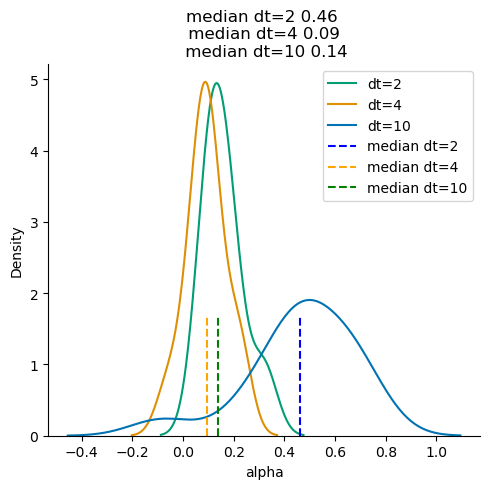

In [41]:
a = sns.displot(data=coefficients, x="alpha", kind="kde",hue='dt',common_norm=False,palette='colorblind',legend=False)
plt.tight_layout()
a.axes[0,0].vlines(coefficients[coefficients.dt == 2].alpha.median(),0,1.7,linestyles='dashed',colors='blue')
a.axes[0,0].vlines(coefficients[coefficients.dt == 4].alpha.median(),0,1.7,linestyles='dashed',colors='orange')
a.axes[0,0].vlines(coefficients[coefficients.dt == 10].alpha.median(),0,1.7,linestyles='dashed',colors='green')
a.axes[0,0].legend(['dt=2','dt=4','dt=10','median dt=2','median dt=4','median dt=10'])
a.axes[0,0].set_title(f'median dt=2 {round(coefficients[coefficients.dt == 2].alpha.median(),2)} \n median dt=4 {round(coefficients[coefficients.dt == 4].alpha.median(),2)} \n median dt=10 {round(coefficients[coefficients.dt == 10].alpha.median(),2)}')
plt.tight_layout()

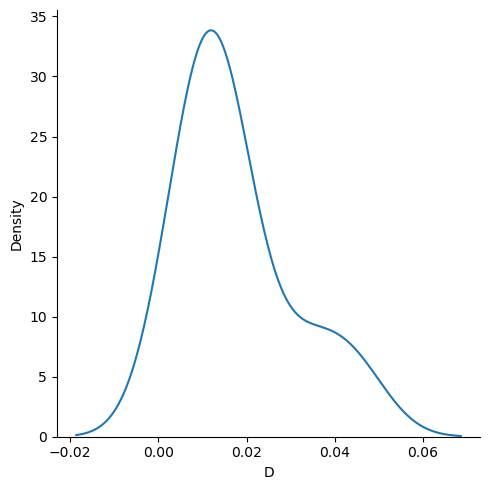

In [52]:
a = sns.displot(data=coefficients, x="D", kind="kde",common_norm=False)
plt.tight_layout()

In [53]:
coefficients.alpha.median()

0.9051101623176984

# plot the distribution of distances in the tracks ans the gaps

In [90]:
df_75 = df_comb[(df_comb['dt']==10)&(df_comb.concentration==75)].copy(deep=True)

In [109]:
df_75_track_1 = df_75[(df_75.track_id == 0)&(df_75.seq == 4)].copy(deep=True)
df_75_track_1.sort_values(by='frame',inplace=True)

In [110]:
df_75_track_1['gaps'] = df_75_track_1.frame.diff()

<AxesSubplot: ylabel='Frequency'>

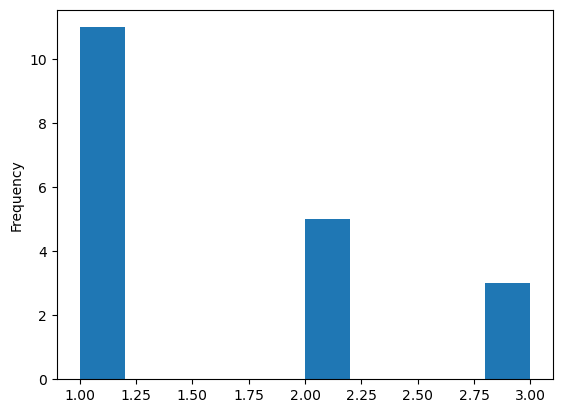

In [113]:
df_75_track_1.gaps.plot(kind='hist')

In [114]:
gaps = []

for i in df_75.seq.unique():
    for j in df_75.track_id.unique():
        track = df_75[(df_75.track_id == j)&(df_75.seq == i)].copy(deep=True)
        track.sort_values(by='frame',inplace=True)
        track['gaps'] = track.frame.diff()
        gaps.append(track.gaps.values)

In [117]:
gaps = np.concatenate(gaps)

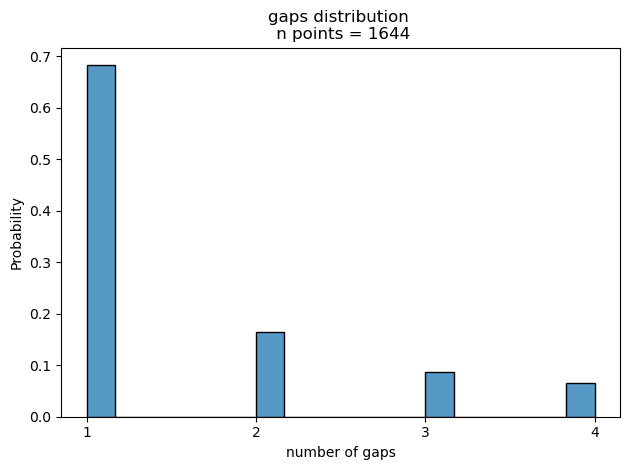

In [150]:
sns.histplot(gaps,stat='probability')
plt.xlabel('number of gaps')
plt.title(f'gaps distribution \n n points = {len(gaps)}')
plt.xticks([1,2,3,4])
plt.tight_layout()
plt.savefig('plots/gaps_distribution.svg')

# plot a track

In [151]:
df = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/75pM/dt_10/filtered_tracks/gt_75pM_seq_4.csv')

In [152]:
df

,track_id,x,y,frame_real,frame
0,0,26.794602,24.580405,9,1
1,0,26.983920,24.070410,4,0
2,0,25.383906,19.268789,39,7
3,0,23.750762,21.491503,34,6
4,0,24.734812,24.515638,24,4
...,...,...,...,...,...
234,101,5.191353,29.654523,104,20
235,101,7.618636,32.614482,84,16
236,101,4.161278,30.524798,119,23
237,124,5.054539,14.146934,119,23


In [173]:
a = df.groupby(by='track_id').size()

In [174]:
a = a[a>5]

In [175]:
a

track_id
0       6
3       6
4      31
7      30
19      9
20     12
27      9
32      7
37     26
52      7
65     26
101     8
129     7
174     6
195    16
dtype: int64

In [176]:
df = df[df.track_id.isin(a.index)]

In [162]:
from tifffile import imread

In [163]:
im = imread('/tungstenfs/scratch/ggiorget/nessim/tracking/ground_truth/75pM/20230328_Rad21-Halo_SPT_1C5_NIPBL_LP4_40mW_75pM_30min_1_w1FullseqTIRF-Cy5-mCherryGFPWithSMB_w1_crop.tif')

In [164]:
im.shape

(200, 5, 35, 35)

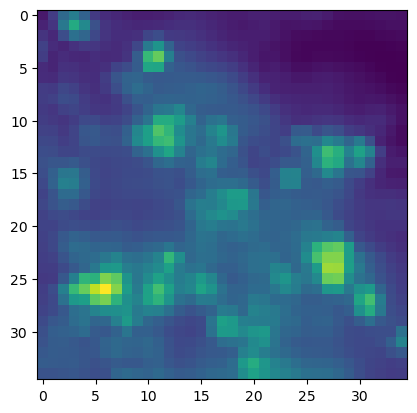

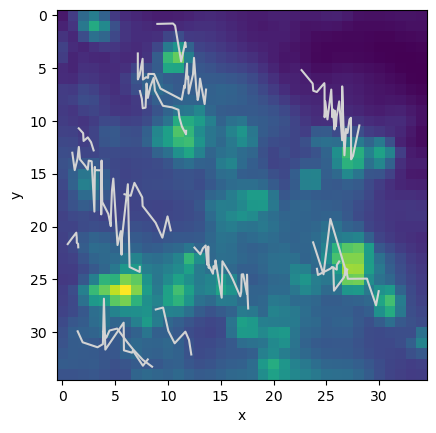

In [193]:
for i in df.track_id.unique():
    track = df[df.track_id == i].sort_values(by='frame')
    sns.lineplot(data=track,x='x',y='y',legend=False,c='lightgrey',zorder=1)
# sns.scatterplot(data=df[df.track_id == 4],x='x',y='y',hue='frame',palette='viridis')
plt.imshow(np.max(im,axis=1)[0])